# Actividad 02 - Data cleaning  aplicado sobre un Dataframe

**Estudiantes:** Daniela Gonzalez, Daniel Bustamente, Brayan Marin

---
## Información del Negocio

**Stakeholders:** Agencia Nacional de Contratación Pública - Colombia Compra Eficiente.

**Preguntas del Negocio:**

1. ¿Cuáles son las 10 entidades públicas que han realizado la mayor cantidad de compras a través de la plataforma de Tienda Virtual del Estado Colombiano en los últimos 12 meses, y cuál es el costo total asociado a sus compras?
2. ¿Cuáles son los 10 instrumentos de agregación de demanda (bienes, obras o servicios) más adquiridos a través de la plataforma?.
3. ¿Cómo ha sido el comportamiento de las compras realizadas a través de la plataforma en los últimos 3 años, y cuántos recaudos se han obtenido en ese período?
4. ¿Quiénes son los principales proveedores de bienes o servicios relacionados con el instrumento de demanda "IAD Software"?

**Fuente de los datos:** Datos Abiertos de Colombia ([Datos consolidados de la Tienda Virtual del Estado Colombiano](https://www.datos.gov.co/Gastos-Gubernamentales/Tienda-Virtual-del-Estado-Colombiano-Consolidado/rgxm-mmea)).  *Fecha actualización de los datos:* 17 de Septiembre del 2023

**Descripción de los datos:** Ordenés de compra pública hechos a través de procesos de agregación de la demanda en acuerdos marco, en la plataforma de Tienda Virtual del Estado Colombiano.

**Diccionario de Datos:**

| Nombre de la columna | Descripción | Tipo de Dato |
| -------------------- | ----------- | ------------ |
| Año | Año de la Orden de compra | Número |
| Identificador de la Orden	| Identificador de la Orden de Compra | Texto (Categórica)|
| Rama de la Entidad | Rama del estado de la Entidad que genera la Orden de Compra | Texto (Categórica) |
| Sector de la Entidad | Sector Estatal de la Entidad que genera la Orden de Compra | Texto (Categórica) |
| Entidad	| Entidad Pública que genera la Orden de compra | Texto (Categórica) |
| Orden de la Entidad | | Texto (Categórica)
| Solicitante	| Persona que hace la solicitud a nombre de la Entidad | Texto (Categórica) |
| Fecha	| Fecha de la Orden | Fecha y hora |
| NIT Entidad	| El identificador NIT de la entidad | Texto (Categórica) |
| Proveedor	| Proveedor al cual se hace la solicitud de compra pública | Texto (Categórica) |
| Estado | Estado de la Orden | Texto (Categórica) |
| Items	| Items relacionados en la orden de compra | Texto (Categórica) |
| Total	| Valor total de la Orden de compra | Número |
| Agregacion	| Agregacion a la que corresponde la Orden de compra | Texto (Categórica) |
| Solicitud	| Identificador de la Solicitud de Compra | Número |
| Ciudad | Ciudad registrada en la orden de compra | Texto (Categórica) |
| Entidad Obigada	| Determina si la entidad esta obligada a hacer unso de la Tienda Virtual del Estado Colombiano | Texto (Categórica) |
| EsPostconflicto	| Determina si la orden de compra corresponde con procesos de compra pública asociados a eventos de postconflicto en el marco del proceso de paz | Texto (Categórica) |
| NIT proveedor	| El identificador NIT del Proveedor | |
| Actividad Economica Proveedor | Actividad economica del proveedor| |

## Proceso de Data Cleaning
---

Preparación del entorno Python y lectura de los datos.


> Importamos las librerias que usaremos para realizar el Data cleaning

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as ticker

> Cargamos el documento csv

Realizaremos el cargue del documento csv para convertirlo en un Data Frame al cual realizaremos el proceso de data cleaning.

In [106]:
# Montaje de unidad de Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# Lectura del archivo csv
data_frame = pd.read_csv('/content/drive/MyDrive/U/Aprendizaje de Máquinas/Actividad 2/Tienda_Virtual_del_Estado_Colombiano_-_Consolidado.csv',encoding='utf-8')
old_data_frame=data_frame

<ipython-input-107-f1b9979ae53c>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv('/content/drive/MyDrive/U/Aprendizaje de Máquinas/Actividad 2/Tienda_Virtual_del_Estado_Colombiano_-_Consolidado.csv',encoding='utf-8')


### Análisis exploratorio de los datos

In [108]:
# Visualización de los datos
data_frame

Año Identificador de la Orden                 Agregacion  \
0       2023                    104914       Combustible Nacional   
1       2023                    104914       Combustible Nacional   
2       2022                    100781    Combustible Nacional II   
3       2022                    100781    Combustible Nacional II   
4       2022                    101221    Combustible Nacional II   
...      ...                       ...                        ...   
855484  2020                     58654        Grandes Superficies   
855485  2022                     96125  IAD Software I  Microsoft   
855486  2022                     96125  IAD Software I  Microsoft   
855487  2019                     40628        Grandes Superficies   
855488  2019                     37497        Grandes Superficies   

       Rama de la Entidad      Sector de la Entidad  \
0             No Definido               No Definido   
1             No Definido               No Definido   
2               Ejecutiva          Defensa Nacional   
3               Ejecutiva          Defensa Nacional   
4               Ejecutiva                 No Aplica   
...                   ...                       ...   
855484          Ejecutiva    Justicia y del Derecho   
855485          Ejecutiva                       NaN   
855486          Ejecutiva                       NaN   
855487          Ejecutiva     Informacin Estadstica   
855488          Ejecutiva  Hacienda y Crdito Pblico   

                                                  Entidad Orden de la Entidad  \
0                                             No Definido         No Definido   
1                                             No Definido         No Definido   
2                        ESCUELA DE POLICIA SIMON BOLIVAR            Nacional   
3                        ESCUELA DE POLICIA SIMON BOLIVAR            Nacional   
4                    VALLE DEL CAUCAMUNICIPIO DE EL DOVIO         Territorial   
...                                                   ...                 ...   
855484  IPIALES  ESTABLECIMIENTO PENITENCIARIO Y CARCE...            Nacional   
855485  DISTRITO ESPECIAL DE CIENCIA TECNOLOGA E INNOV...         Territorial   
855486  DISTRITO ESPECIAL DE CIENCIA TECNOLOGA E INNOV...         Territorial   
855487                              DANE  VALLE DEL CAUCA            Nacional   
855488        DIRECCION DE IMPUESTOS Y ADUANAS NACIONALES            Nacional   

        NIT Entidad                  Solicitante                   Fecha  \
0               NaN               Juan Luna Toro  02/17/2023 12:00:00 AM   
1               NaN               Juan Luna Toro  02/17/2023 12:00:00 AM   
2       800141336.0      Deiber Marulanda Pineda  11/29/2022 12:00:00 AM   
3       800141336.0      Deiber Marulanda Pineda  11/29/2022 12:00:00 AM   
4       891901223.0         MIGUEL GUZMAN GARCIA  12/04/2022 12:00:00 AM   
...             ...                          ...                     ...   
855484  837000111.0  Julio Vicente Cortes Arroyo  11/14/2020 12:00:00 AM   
855485  890905211.0  Diana Juliet Sanchez Rivera  09/15/2022 12:00:00 AM   
855486  890905211.0  Diana Juliet Sanchez Rivera  09/15/2022 12:00:00 AM   
855487  899999027.0   Diego Fernando Ospina Toro  09/11/2019 12:00:00 AM   
855488  800197268.0     Ana Maria Salcedo Ospino  04/26/2019 12:00:00 AM   

                                 Proveedor   Estado  Solicitud  \
0                               Sodexo SAS  Emitida   157390.0   
1                               Sodexo SAS  Emitida   157390.0   
2                               Sodexo SAS  Emitida   152887.0   
3                               Sodexo SAS  Emitida   152887.0   
4                               Sodexo SAS  Emitida   174673.0   
...                                    ...      ...        ...   
855484            Falabella de Colombia SA  Cerrada   104053.0   
855485              Unin Temporal DELL EMC  Cerrada   164955.0   
855486              Unin Temporal DELL 

In [109]:
# Dimensiones del Data Frame
tamano_inicial = data_frame.shape
print(f"Dimensiones iniciales del data frame: {tamano_inicial}")

Dimensiones iniciales del data frame: (855489, 20)


In [110]:
# Detalle de los datos
data_frame.describe(include='all')

Año Identificador de la Orden           Agregacion  \
count   855489.000000                    855489               853757   
unique            NaN                    115984                  170   
top               NaN                    114355  Grandes Superficies   
freq              NaN                        58               218991   
mean      2020.263842                       NaN                  NaN   
std          2.374093                       NaN                  NaN   
min       2013.000000                       NaN                  NaN   
25%       2019.000000                       NaN                  NaN   
50%       2021.000000                       NaN                  NaN   
75%       2022.000000                       NaN                  NaN   
max       2023.000000                       NaN                  NaN   

       Rama de la Entidad Sector de la Entidad      Entidad  \
count              854957               780550       855489   
unique                  5                   26         2581   
top             Ejecutiva     Defensa Nacional  No Definido   
freq               703307               185492        17386   
mean                  NaN                  NaN          NaN   
std                   NaN                  NaN          NaN   
min                   NaN                  NaN          NaN   
25%                   NaN                  NaN          NaN   
50%                   NaN                  NaN          NaN   
75%                   NaN                  NaN          NaN   
max                   NaN                  NaN          NaN   

       Orden de la Entidad NIT Entidad           Solicitante  \
count               854957      838099                855489   
unique                   3        3953                  9750   
top               Nacional   899999061  Ricardo Varon Romero   
freq                551595       31020                  3110   
mean                   NaN         NaN                   NaN   
std                    NaN         NaN                   NaN   
min                    NaN         NaN                   NaN   
25%                    NaN         NaN                   NaN   
50%                    NaN         NaN                   NaN   
75%                    NaN         NaN                   NaN   
max                    NaN         NaN                   NaN   

                         Fecha                           Proveedor   Estado  \
count                   855489                              855489   855489   
unique                    2919                                1151        4   
top     05/23/2022 12:00:00 AM  PANAMERICANA LIBRERA Y PAPELERA SA  Emitida   
freq                      2154                               88881   622094   
mean                       NaN                                 NaN      NaN   
std                        NaN                                 NaN      NaN   
min                        NaN                                 NaN      NaN   
25%                        NaN                                 NaN      NaN   
50%                        NaN                                 NaN      NaN   
75%                        NaN                                 NaN      NaN   
max                        NaN                                 NaN      NaN   

            Solicitud                   Items         Total  Ciudad  \
count   847729.000000                  855489  8.554890e+05  855489   
unique            NaN                   93599           NaN    2640   
top               NaN  Combustible Categora C           NaN  BOGOTA   
freq              NaN                   14511           NaN  104599   
mean    113130.373608                     NaN  2.954037e+08     NaN   
std      59556.455521                     NaN  3.449305e+09     NaN   
min          6.000000                     NaN  0.000000e+00     NaN   
25%      59454.000000                     NaN  4.063850e+06     NaN   
50%     123136.000000                  

#### Análisis de Correlaciones

In [111]:
matrix_correlaciones = data_frame.corr().round(2)
matrix_correlaciones

<ipython-input-111-690abeeeec85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_correlaciones = data_frame.corr().round(2)


Año  Solicitud  Total
Año        1.00       0.97   0.01
Solicitud  0.97       1.00   0.01
Total      0.01       0.01   1.00

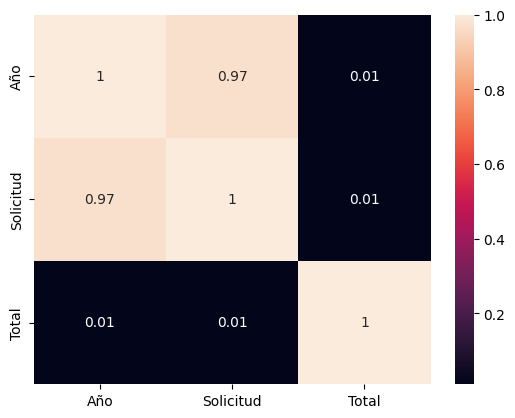

In [112]:
#Diagrama de calor
sns.heatmap(data=matrix_correlaciones, annot=True)
plt.show()

### Aplicación técnicas de Data Cleaning

> Eliminación de datos duplicados

In [113]:
#Eliminamos los datos duplicados
data_frame.drop_duplicates(inplace=True)

# Restablecer el índice
data_frame = data_frame.reset_index()

data_frame.shape


(236287, 21)


> Eliminación de datos irrelevantes

Se eliminan las columnas no necesarias para el análisis de los datos con el objetivo de resolver las preguntas del negocio.

In [114]:
#Eliminamos datos irrelevantes

#Datos a conservar (datos relevantes)
campos=['Año', 'Fecha', 'Agregacion', 'Sector de la Entidad', 'Entidad',
        'Proveedor', 'Estado', 'Solicitud', 'Total' ]
data_frame = data_frame[campos]

#Data Frame con datos irrelevantes para el análisis propuesto
data_frame

Año                   Fecha               Agregacion  \
0       2023  02/17/2023 12:00:00 AM     Combustible Nacional   
1       2022  11/29/2022 12:00:00 AM  Combustible Nacional II   
2       2022  12/04/2022 12:00:00 AM  Combustible Nacional II   
3       2022  12/16/2022 12:00:00 AM  Combustible Nacional II   
4       2023  01/17/2023 12:00:00 AM  Combustible Nacional II   
...      ...                     ...                      ...   
236282  2022  03/24/2022 12:00:00 AM       Emergencia COVID19   
236283  2019  04/30/2019 12:00:00 AM  Consumibles de Impresin   
236284  2016  03/09/2016 12:00:00 AM         Servicios Oracle   
236285  2022  05/27/2022 12:00:00 AM      Grandes Superficies   
236286  2020  12/14/2020 12:00:00 AM      Grandes Superficies   

          Sector de la Entidad  \
0                  No Definido   
1             Defensa Nacional   
2                    No Aplica   
3             Defensa Nacional   
4                    No Aplica   
...                        ...   
236282       Educacin Nacional   
236283        Defensa Nacional   
236284        Defensa Nacional   
236285  Justicia y del Derecho   
236286         Funcion Publica   

                                                  Entidad  \
0                                             No Definido   
1                        ESCUELA DE POLICIA SIMON BOLIVAR   
2                    VALLE DEL CAUCAMUNICIPIO DE EL DOVIO   
3                                               CENAC ING   
4                       CUNDINAMARCA  ALCALDIA DE FUQUENE   
...                                                   ...   
236282  INSTITUTO COLOMBIANO DE CREDITO EDUCATIVO Y ES...   
236283  FUERZA AEREA COLOMBIANA  BASE AEREA COMANDO FU...   
236284  CENTRAL ADMINISTRATIVA Y CONTABLE ESPECIALIZAD...   
236285  ESTABLECIMIENTO  PENITENCIARIO Y CARCELARIO DE...   
236286  DEPARTAMENTO ADMINISTRATIVO DE LA FUNCION PUBLICA   

                   Proveedor   Estado  Solicitud        Total  
0                 Sodexo SAS  Emitida   157390.0    3183000.0  
1                 Sodexo SAS  Emitida   152887.0  110000000.0  
2                 Sodexo SAS  Emitida   174673.0    5000000.0  
3                 Sodexo SAS  Emitida   175719.0  492199550.0  
4                 Sodexo SAS  Emitida   156642.0  342000000.0  
...                      ...      ...        ...          ...  
236282            CLEANER SA  Emitida   152589.0    1291551.0  
236283            SumimasSAS  Cerrada    64588.0  158567499.0  
236284  Oracle Colombia Ltda  Emitida    14763.0   37627297.0  
236285  CENCOSUD COLOMBIA SA  Emitida   158139.0    3280672.0  
236286  CENCOSUD COLOMBIA SA  Emitida   109694.0   15202000.0  

[236287 rows x 9 columns]

> Tratamiento de datos faltantes

Los registros con datos faltantes son identificados y son eliminados.


In [115]:
# Validar registros con campos con valores NaN o vacios
data_frame.isna().sum()

Año                         0
Fecha                       0
Agregacion                222
Sector de la Entidad    19747
Entidad                     0
Proveedor                   0
Estado                      0
Solicitud                1214
Total                       0
dtype: int64

In [116]:
# Eliminamos filas que tengas valores NaN o vacios
# Nota: campo Solicitud lo requiere para su conversión a dato numérico
data_frame.dropna(inplace=True)

# Restablecer el índice
data_frame = data_frame.reset_index()



> Estandarización de formatos




In [117]:
# Corrección de los tipos de datos de las columnas

# Verificamos los tipos de las columnas por defecto
print(f"Tipos de columna por defecto del dataFrame:\n{data_frame.dtypes}\n--------------------------------------------------")

data_frame['Año'] = data_frame['Año'].astype(int)
data_frame['Fecha'] = pd.to_datetime(data_frame['Fecha'])
data_frame['Agregacion'] = data_frame['Agregacion'].astype(str)
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].astype(str)
data_frame['Entidad'] = data_frame['Entidad'].astype(str)
data_frame['Proveedor'] = data_frame['Proveedor'].astype(str)
data_frame['Estado'] = data_frame['Estado'].astype(str)
data_frame['Solicitud'] = data_frame['Solicitud'].astype(int)
data_frame['Total'] = data_frame['Total'].astype(float).round(2)

#Verificamos los tipos de las columnas por defecto
print(f"\nNuevos tipos de columnas del dataFrame:\n{data_frame.dtypes}")

Tipos de columna por defecto del dataFrame:
index                     int64
Año                       int64
Fecha                    object
Agregacion               object
Sector de la Entidad     object
Entidad                  object
Proveedor                object
Estado                   object
Solicitud               float64
Total                   float64
dtype: object
--------------------------------------------------

Nuevos tipos de columnas del dataFrame:
index                            int64
Año                              int64
Fecha                   datetime64[ns]
Agregacion                      object
Sector de la Entidad            object
Entidad                         object
Proveedor                       object
Estado                          object
Solicitud                        int64
Total                          float64
dtype: object


In [118]:
# Capitalizar la primera letra de cada valor de la columna "Entidad"
data_frame['Entidad'] = data_frame['Entidad'].str.title()

data_frame

index   Año      Fecha               Agregacion  \
0            0  2023 2023-02-17     Combustible Nacional   
1            1  2022 2022-11-29  Combustible Nacional II   
2            2  2022 2022-12-04  Combustible Nacional II   
3            3  2022 2022-12-16  Combustible Nacional II   
4            4  2023 2023-01-17  Combustible Nacional II   
...        ...   ...        ...                      ...   
215220  236282  2022 2022-03-24       Emergencia COVID19   
215221  236283  2019 2019-04-30  Consumibles de Impresin   
215222  236284  2016 2016-03-09         Servicios Oracle   
215223  236285  2022 2022-05-27      Grandes Superficies   
215224  236286  2020 2020-12-14      Grandes Superficies   

          Sector de la Entidad  \
0                  No Definido   
1             Defensa Nacional   
2                    No Aplica   
3             Defensa Nacional   
4                    No Aplica   
...                        ...   
215220       Educacin Nacional   
215221        Defensa Nacional   
215222        Defensa Nacional   
215223  Justicia y del Derecho   
215224         Funcion Publica   

                                                  Entidad  \
0                                             No Definido   
1                        Escuela De Policia Simon Bolivar   
2                    Valle Del Caucamunicipio De El Dovio   
3                                               Cenac Ing   
4                       Cundinamarca  Alcaldia De Fuquene   
...                                                   ...   
215220  Instituto Colombiano De Credito Educativo Y Es...   
215221  Fuerza Aerea Colombiana  Base Aerea Comando Fu...   
215222  Central Administrativa Y Contable Especializad...   
215223  Establecimiento  Penitenciario Y Carcelario De...   
215224  Departamento Administrativo De La Funcion Publica   

                   Proveedor   Estado  Solicitud        Total  
0                 Sodexo SAS  Emitida     157390    3183000.0  
1                 Sodexo SAS  Emitida     152887  110000000.0  
2                 Sodexo SAS  Emitida     174673    5000000.0  
3                 Sodexo SAS  Emitida     175719  492199550.0  
4                 Sodexo SAS  Emitida     156642  342000000.0  
...                      ...      ...        ...          ...  
215220            CLEANER SA  Emitida     152589    1291551.0  
215221            SumimasSAS  Cerrada      64588  158567499.0  
215222  Oracle Colombia Ltda  Emitida      14763   37627297.0  
215223  CENCOSUD COLOMBIA SA  Emitida     158139    3280672.0  
215224  CENCOSUD COLOMBIA SA  Emitida     109694   15202000.0  

[215225 rows x 10 columns]

In [119]:
datos_unicos_df = data_frame['Entidad'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

Entidad
0                                           No Definido
1                      Escuela De Policia Simon Bolivar
2                  Valle Del Caucamunicipio De El Dovio
3                                             Cenac Ing
4                     Cundinamarca  Alcaldia De Fuquene
...                                                 ...
2418  Sucre  Institucion Educativa Ismael Contreras ...
2419                  Alcaldia Municipal La Cruz Nari�O
2420                           Bogotacolegio Espa�A Ied
2421                  Contraloria Distrital De Medellin
2422       Antioquia  Contraloria Municipal De Sabaneta

[2423 rows x 1 columns]

In [120]:
# Capitalizar la primera letra de cada valor del campo Proveedor
# Separar las palabras y capitalizar la primera letra de cada palabra
data_frame['Proveedor'] = data_frame['Proveedor'].str.title()

# Encontrar la última palabra en cada fila y ponerla en mayúsculas
data_frame['Proveedor'] = data_frame['Proveedor'].apply(lambda x: ' '.join([word if i < len(x.split()) - 1 else word.upper() for i, word in enumerate(x.split())]))

data_frame

index   Año      Fecha               Agregacion  \
0            0  2023 2023-02-17     Combustible Nacional   
1            1  2022 2022-11-29  Combustible Nacional II   
2            2  2022 2022-12-04  Combustible Nacional II   
3            3  2022 2022-12-16  Combustible Nacional II   
4            4  2023 2023-01-17  Combustible Nacional II   
...        ...   ...        ...                      ...   
215220  236282  2022 2022-03-24       Emergencia COVID19   
215221  236283  2019 2019-04-30  Consumibles de Impresin   
215222  236284  2016 2016-03-09         Servicios Oracle   
215223  236285  2022 2022-05-27      Grandes Superficies   
215224  236286  2020 2020-12-14      Grandes Superficies   

          Sector de la Entidad  \
0                  No Definido   
1             Defensa Nacional   
2                    No Aplica   
3             Defensa Nacional   
4                    No Aplica   
...                        ...   
215220       Educacin Nacional   
215221        Defensa Nacional   
215222        Defensa Nacional   
215223  Justicia y del Derecho   
215224         Funcion Publica   

                                                  Entidad  \
0                                             No Definido   
1                        Escuela De Policia Simon Bolivar   
2                    Valle Del Caucamunicipio De El Dovio   
3                                               Cenac Ing   
4                       Cundinamarca  Alcaldia De Fuquene   
...                                                   ...   
215220  Instituto Colombiano De Credito Educativo Y Es...   
215221  Fuerza Aerea Colombiana  Base Aerea Comando Fu...   
215222  Central Administrativa Y Contable Especializad...   
215223  Establecimiento  Penitenciario Y Carcelario De...   
215224  Departamento Administrativo De La Funcion Publica   

                   Proveedor   Estado  Solicitud        Total  
0                 Sodexo SAS  Emitida     157390    3183000.0  
1                 Sodexo SAS  Emitida     152887  110000000.0  
2                 Sodexo SAS  Emitida     174673    5000000.0  
3                 Sodexo SAS  Emitida     175719  492199550.0  
4                 Sodexo SAS  Emitida     156642  342000000.0  
...                      ...      ...        ...          ...  
215220            Cleaner SA  Emitida     152589    1291551.0  
215221            SUMIMASSAS  Cerrada      64588  158567499.0  
215222  Oracle Colombia LTDA  Emitida      14763   37627297.0  
215223  Cencosud Colombia SA  Emitida     158139    3280672.0  
215224  Cencosud Colombia SA  Emitida     109694   15202000.0  

[215225 rows x 10 columns]

In [121]:
datos_unicos_df = data_frame['Proveedor'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

Proveedor
0                                            Sodexo SAS
1                                 Organizacin Terpel SA
2                                              POLYFLEX
3                                              Ofix SAS
4                              Inversiones El Norte SAS
...                                                 ...
1106      Compa�A Internacional De Integracin Sa Ci2 SA
1107                      Sandra Patricia Ca�N CHAPARRO
1108  Manpower Cis Sas Manpower Compa�A Integral De ...
1109                                       Ut TEXTIMODA
1110                             Union Temporal LCT2022

[1111 rows x 1 columns]

In [122]:
datos_unicos_df = data_frame['Estado'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

Estado
0        Emitida
1        Cerrada
2      Cancelada
3  CerradaxError

In [123]:
datos_unicos_df = data_frame['Solicitud'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

Solicitud
0          157390
1          152887
2          174673
3          175719
4          156642
...           ...
102042     197595
102043     197615
102044     197312
102045     194079
102046     197738

[102047 rows x 1 columns]

In [124]:
datos_unicos_df_total = data_frame['Total'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df_total

Total
0        3183000.0
1      110000000.0
2        5000000.0
3      492199550.0
4      342000000.0
...            ...
92892   51195700.0
92893  157488531.0
92894   42996857.0
92895    5246820.0
92896  145476274.0

[92897 rows x 1 columns]

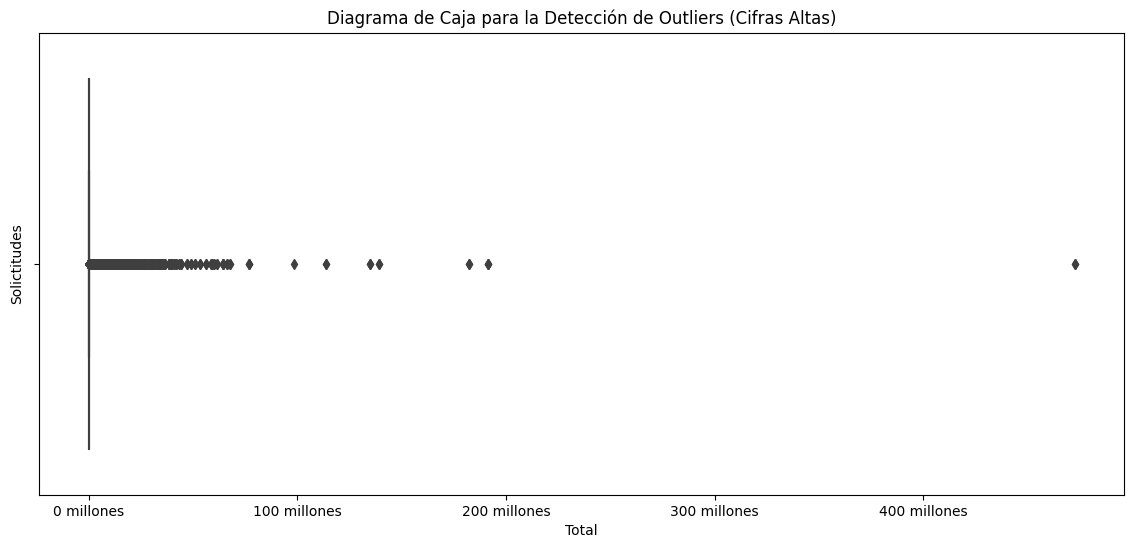

In [125]:
# Crear un diagrama de caja (boxplot) para visualizar outliers
plt.figure(figsize=(14, 6))
sns.boxplot(x=data_frame['Total'])
plt.title('Diagrama de Caja para la Detección de Outliers (Cifras Altas)')
plt.xlabel('Total')

# Personalizar las etiquetas del eje x para mostrar en "millones"
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e09:.0f} millones'))

plt.ylabel('Solictitudes')
plt.show()



> Corrección de errores tipográficos o de entrada



In [126]:
# Corrección errores tipográficos

# Corregimos errores tipográficos del campo Agregacion
diccionario_agregacion = {
    r'\b(.istribucin)': 'Distribución',
    r'\b(.mpresin)': 'Impresión',
    r'\b(tiles)': 'útiles',
    r'\b(.onstruccin)': 'construcción',
    r'\b(.reos)': 'Aéreos',
    r'\b(.ehculos)': 'Vehículos',
    r'\b(.otacin)': 'Dotación',
    r'\b(.tencin)': 'Atención',
    r'\b(.dquisicin)': 'Adquisición',
    r'\b(.erifricos)': 'Periféricos',
    r'\b(Crnica)': 'Crónica',
    r'\b(.blica)': 'Pública',
    r'\b(.edaggico)': 'Pedagógico',
    r'\b(.edagogico)': 'Pedagógico',
    r'\b(.ntermediacin)': 'Intermediación',
    r'\b(.iomdicos)': 'Biomédicos',
    r'\b(.artn)': 'cartón',
    r'\b(.arton)': 'cartón',
    r'\b(.atemticas)': 'Matemáticas',
    r'\b(.mgenes )': 'Imágenes',
    r'\b(.rnsito)': 'Tránsito',
    r'\b(.ropagacin)': 'propagación',
    r'\b(.viacin)': 'Aviación',
    r'\b(.enguaje)': "Lenguaje"

}

# Realizar el reemplazo en la columna "Agregacion" usando el diccionario de agregaciones
for patron, agregacion in diccionario_agregacion.items():
    data_frame['Agregacion'] = data_frame['Agregacion'].str.replace(patron, agregacion, regex=True)


In [127]:
datos_unicos_df = data_frame['Agregacion'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

Agregacion
0                                 Combustible Nacional
1                              Combustible Nacional II
2                                  Grandes Superficies
3                             Combustible Nacional III
4                                  Material Pedagógico
..                                                 ...
159                      Soluciones de videovigilancia
160                 Dotación de Vestuario de Calle III
161                                      Fotovoltaicos
162  Seguro Obligatorio de Accidentes de Tránsito  ...
163  Adquisición de Imágenespor plataformas satelit...

[164 rows x 1 columns]



> Manejo de datos inconsistentes



In [128]:
# Corrección categorías mal etiquetadas

# Correción campo "Sector de la Entidad"
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].replace({'No Aplica': 'No Definido'})
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].replace({'Planeacin': 'Planeación'})
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].replace({'Funcion Publica': 'Función Pública'})
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].replace({'Hacienda y Crdito Pblico': 'Hacienda y Crédito Público'})
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].replace({'Informacin Estadstica': 'Información Estadística'})

diccionario_sector = {
    r'\b(Proteccin)': 'Protección',
    r'\b(Tecnologa)': 'Tecnología',
    r'\b(Educacin)': 'Educación',
    r'\b(Repblica)': 'República',
    r'\b(Energa)': 'Energía',
    r'\b(Informacin)': 'Información',
    r'\b(Tecnologas)': 'Tecnologías',
    r'\b(Inclusin)': 'Inclusión',
    r'\b(reconciliacin)': 'reconciliación'
}

for patron, sector in diccionario_sector.items():
    data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].str.replace(patron, sector, regex=True)



In [129]:
datos_unicos_df = data_frame['Sector de la Entidad'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

Sector de la Entidad
0                                         No Definido
1                                    Defensa Nacional
2                                     Función Pública
3                                            Interior
4                                          Transporte
5                                             Cultura
6                                          Planeación
7                           Salud y Protección Social
8                               Relaciones Exteriores
9                        Vivienda Ciudad y Territorio
10                     Agricultura y Desarrollo Rural
11                                 Educación Nacional
12                   Ambiente y Desarrollo Sostenible
13                         Hacienda y Crédito Público
14                             Justicia y del Derecho
15                                            Trabajo
16                        Presidencia de la República
17                                    Minas y Energía
18                       Comercio Industria y Turismo
19                               Ciencia y Tecnología
20                                            Deporte
21                            Información Estadística
22  Tecnologías de la Información y las comunicaci...
23                  Inclusión social y reconciliación
24      Inteligencia Estrategica y Contrainteligencia

In [130]:
# Dimensiones del Data Frame
tamano_final = data_frame.shape
print(f"Dimensiones del data frame luego del proceso de data cleaning: {tamano_final}")

Dimensiones del data frame luego del proceso de data cleaning: (215225, 10)


### **Resultados del Data Cleaning**

In [131]:
print(f"Cantidad de datos del data set original: {tamano_inicial[0]}")

Cantidad de datos del data set original: 855489


In [132]:
print(f"Cantidad de datos al finalizar el proceso de data cleaning: {tamano_final[0]}")

Cantidad de datos al finalizar el proceso de data cleaning: 215225


In [133]:
# Calculo porcentaje de depuración de registros
diferencia_registros = tamano_inicial[0] - tamano_final[0]
porcentaje_diferencia = (diferencia_registros /tamano_inicial[0] ) * 100

print(f"Al finalizar el proceso de data cleaning se han eliminado el {porcentaje_diferencia:.2f}% de los registros del data set original")

Al finalizar el proceso de data cleaning se han eliminado el 74.84% de los registros del data set original


## **Gráficos utilizando Seaborn y Matplotlib**

**¿Cuáles son las 10 entidades públicas que han realizado la mayor cantidad de compras a través de la plataforma de Tienda Virtual del Estado Colombiano en los últimos 12 meses, y cuál es el costo total asociado a sus compras?**

In [134]:
# Filtrar los datos para obtener compras en los últimos 12 meses
hoy = datetime.date.today()
fecha_limite = hoy - datetime.timedelta(days=365)
# compras_ultimos_12_meses = data_frame[data_frame['Fecha'] >= fecha_limite]

In [135]:
# Convertir fecha_limite en un objeto datetime
fecha_limite = datetime.datetime.combine(fecha_limite, datetime.datetime.min.time())
compras_ultimos_12_meses = data_frame[data_frame['Fecha'] >= fecha_limite]

In [136]:
# Calcular el costo total de compras por entidad en los últimos 12 meses
costo_total_por_entidad = compras_ultimos_12_meses.groupby(['Entidad', 'Sector de la Entidad'])['Total'].sum().reset_index()

In [137]:
# Ordenar las entidades por costo total descendente y tomar las 10 principales
top_10_entidades = costo_total_por_entidad.nlargest(10, 'Total')

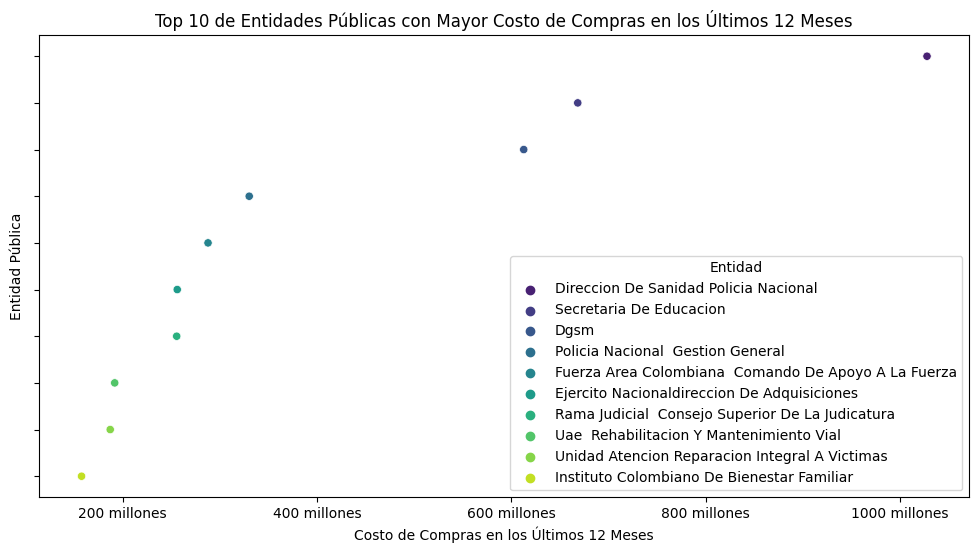

In [138]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Total',
    y='Entidad',
    data=top_10_entidades,
    hue='Entidad',
    palette='viridis',
)

plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Costo de Compras en los Últimos 12 Meses')
plt.ylabel('Entidad Pública')
plt.title('Top 10 de Entidades Públicas con Mayor Costo de Compras en los Últimos 12 Meses')
# Personalizar las etiquetas del eje x para mostrar en "millones"
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e9:.0f} millones'))

# Quitar las etiquetas del eje y
ax.set_yticklabels([])
plt.show()

**Principales proveedores del instrumento de demanda “IAD Software”**

In [139]:
# Filtrar el DataFrame para obtener solo las filas relacionadas con "IAD Software"
filtro_iad = data_frame[data_frame['Agregacion'] == 'IAD Software']

# Calcular la frecuencia de cada proveedor
frecuencia_proveedores = filtro_iad['Proveedor'].value_counts()

#Seleccionar los principales proveedores (por ejemplo, los 10 primeros)
principales_proveedores = frecuencia_proveedores.head(10)

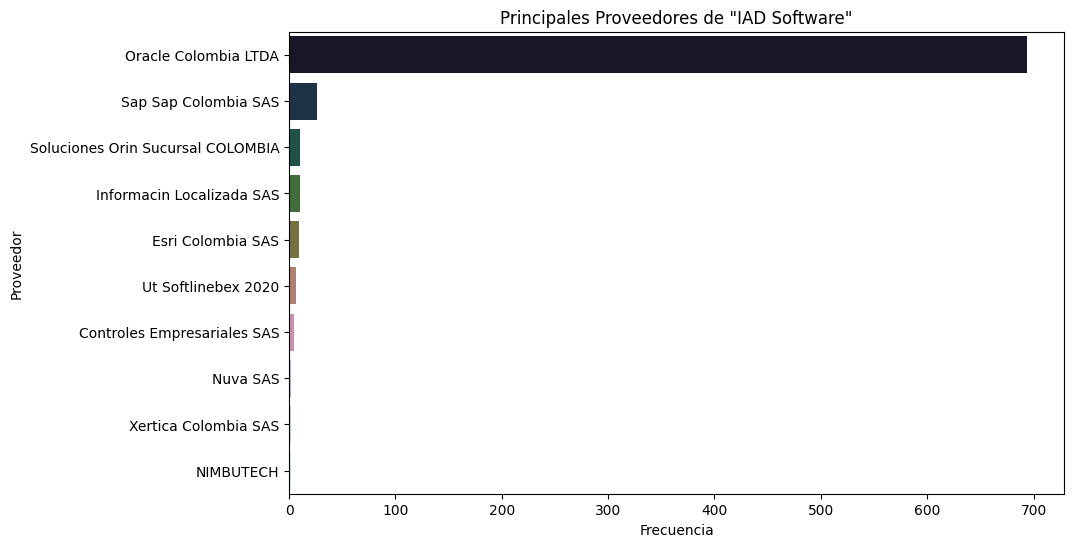

In [140]:
# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=principales_proveedores.values, y=principales_proveedores.index, palette="cubehelix")
plt.xlabel('Frecuencia')
plt.ylabel('Proveedor')
plt.title('Principales Proveedores de "IAD Software"')
plt.show()

**Principales proveedores del instrumento de demanda “IAD Software”**

***Versión 2***

In [141]:
# Filtrar el DataFrame para seleccionar las compras relacionadas con "IAD Software"
iad_software_df = data_frame[data_frame['Agregacion'] == 'IAD Software']

In [142]:
# Agrupar por proveedor y calcular el gasto total en "IAD Software" por proveedor
proveedores_gasto = iad_software_df.groupby('Proveedor')['Total'].sum().reset_index()

In [143]:
# Ordenar los proveedores por gasto total en orden descendente
proveedores_gasto = proveedores_gasto.sort_values(by='Total', ascending=False)

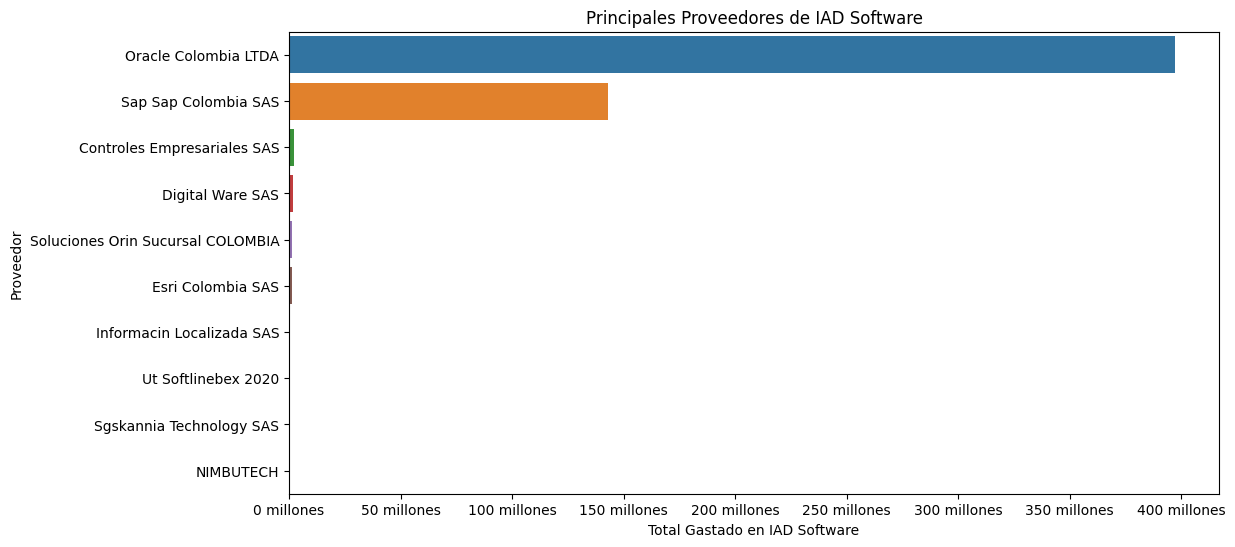

In [144]:
# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Proveedor', data=proveedores_gasto.head(10))
plt.xlabel('Total Gastado en IAD Software')
plt.ylabel('Proveedor')
plt.title('Principales Proveedores de IAD Software')
# Personalizar las etiquetas del eje x para mostrar en "millones"
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e9:.0f} millones'))
plt.show()

**Top 10 de Instrumentos de agregación de demanda (bienes, obras o servicios) adquiridos por medio de la plataforma.**

In [145]:
# Agrupa y cuenta las ocurrencias de cada instrumento de agregación
top_10_agregacion = data_frame['Agregacion'].value_counts().head(10)

# Crea un DataFrame a partir del resultado anterior
top_10_agregacion_df = pd.DataFrame({'Instrumento de Agregación': top_10_agregacion.index, 'Cantidad': top_10_agregacion.values})


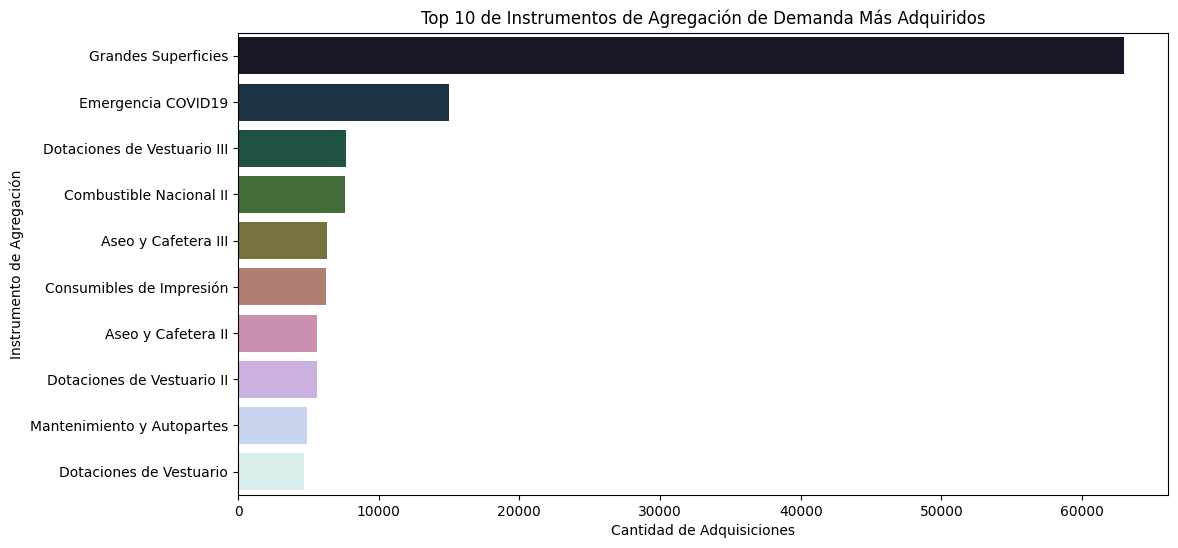

In [146]:
# Graficar los datos
plt.figure(figsize=(12, 6))
sns.barplot(x='Cantidad', y='Instrumento de Agregación', data=top_10_agregacion_df, palette='cubehelix')
plt.xlabel('Cantidad de Adquisiciones')
plt.ylabel('Instrumento de Agregación')
plt.title('Top 10 de Instrumentos de Agregación de Demanda Más Adquiridos')
plt.show()

**Top 10 de Instrumentos de agregación de demanda (bienes, obras o servicios) adquiridos por medio de la plataforma.**

***Version 2***

In [147]:
# Agrupa y cuenta las ocurrencias de cada instrumento de agregación
top_10_agregacion = data_frame['Agregacion'].value_counts().head(10)

# Crea un DataFrame a partir del resultado anterior
top_10_agregacion_df = pd.DataFrame({'Instrumento de Agregación': top_10_agregacion.index, 'Cantidad': top_10_agregacion.values})

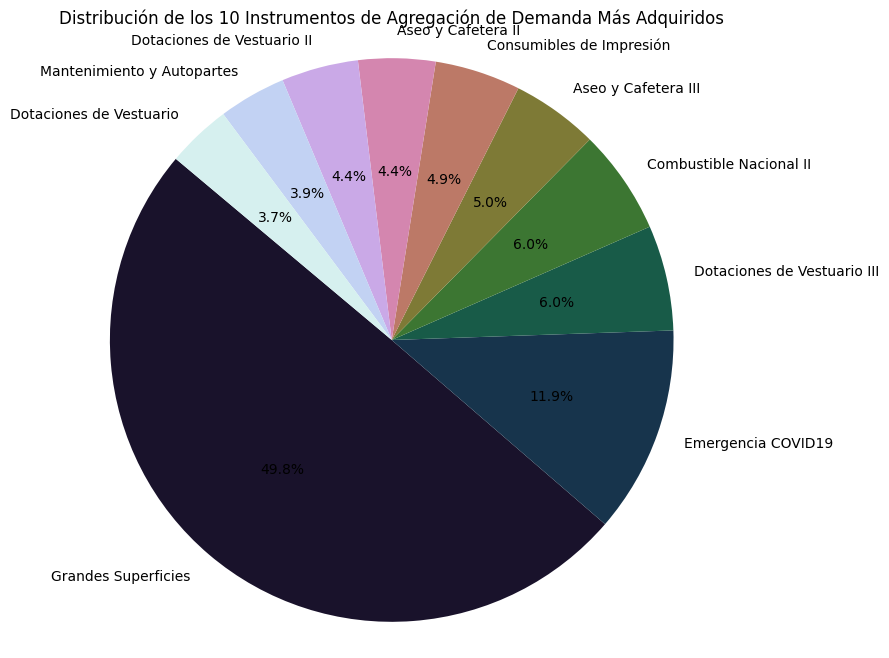

In [148]:
# Configura el tamaño de la figura
plt.figure(figsize=(8, 8))

# Crea el gráfico circular
plt.pie(top_10_agregacion_df['Cantidad'], labels=top_10_agregacion_df['Instrumento de Agregación'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('cubehelix', 10))

# Añade un título
plt.title('Distribución de los 10 Instrumentos de Agregación de Demanda Más Adquiridos')

# Muestra el gráfico
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.show()

**¿Cómo ha sido el comportamiento de las compras realizadas a través de la plataforma en los últimos 3 años, y cuántos recaudos se han obtenido en ese período?**

In [149]:
# Agregar una columna 'Año' al DataFrame
data_frame['Año'] = data_frame['Fecha'].dt.year

# Crear un DataFrame agregado por año y sumar los valores de 'Total' y 'Recaudos'
resumen_anual = data_frame.groupby('Año')[['Total']].sum().reset_index()

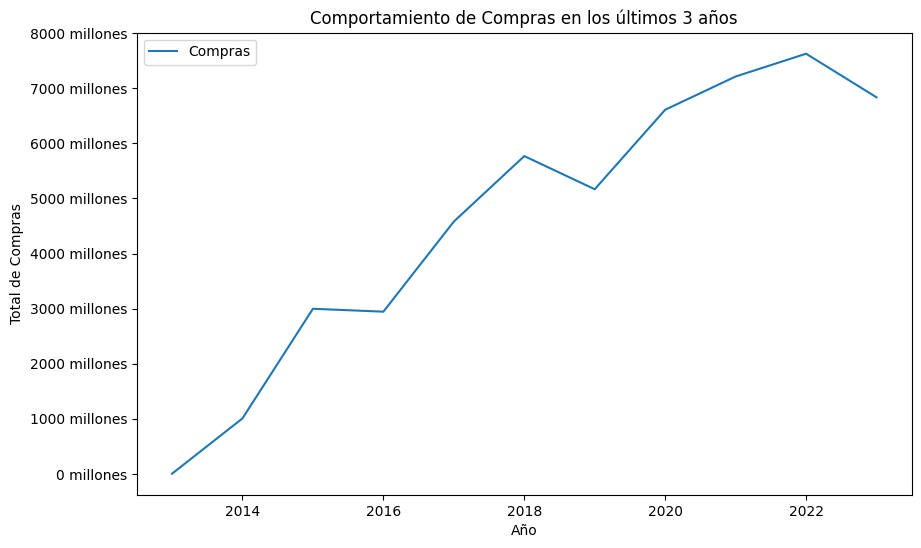

In [150]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Total', data=resumen_anual, label='Compras')
# Configurar etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Total de Compras')
plt.title('Comportamiento de Compras en los últimos 3 años')

# Personalizar las etiquetas del eje y para mostrar en "mil millones"
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e9:.0f} millones'))

# Mostrar el gráfico
plt.show()

**¿Cómo ha sido el comportamiento de las compras *por proveedor* realizadas a través de la plataforma en los últimos 3 años, y cuántos recaudos se han obtenido en ese período?**

In [151]:
# Agregar una columna 'Año' al DataFrame
data_frame['Año'] = data_frame['Fecha'].dt.year

# Crear un DataFrame agregado por año, sector y sumar los valores de 'Total'
resumen_anual = data_frame.groupby(['Año', 'Proveedor'])['Total'].sum().reset_index()

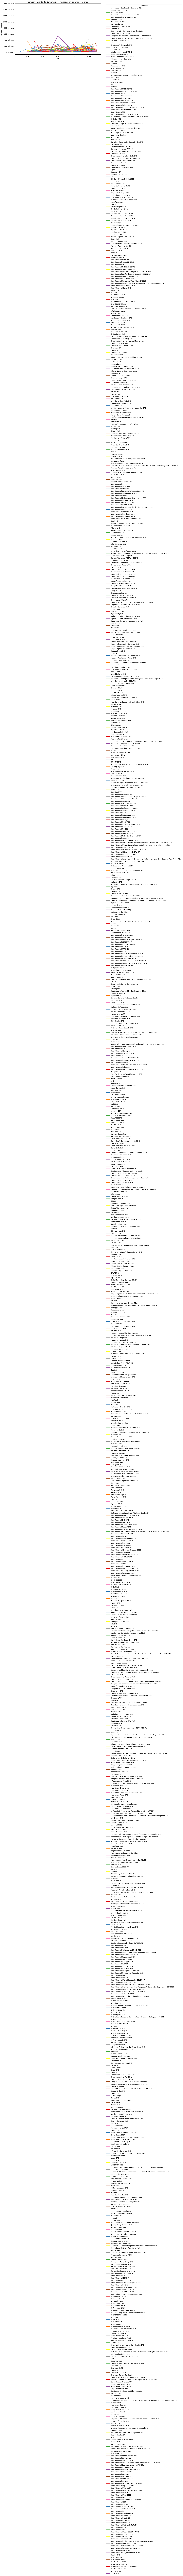

In [152]:
# Crear el gráfico de líneas con colores por sector
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Total', hue='Proveedor', data=resumen_anual, palette='Set1')

# Configurar etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Total de Compras')
plt.title('Comportamiento de Compras por Proveedor en los últimos 3 años')

# Mostrar la leyenda en el lado derecho del gráfico y fuera de él
plt.legend(title='Proveedor', bbox_to_anchor=(1.05, 1), loc='upper left')

# Personalizar las etiquetas del eje y para mostrar en "mil millones"
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e9:.0f} millones'))

# Mostrar el gráfico
plt.show()